In [ ]:
# Necessary imports to read the datasets
import pandas as pd
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install "u8darts[all]==0.34.0" --no-cache-dir --upgrade --quiet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Google Colab
file_path = "/content/drive/MyDrive/Colab Notebooks/TFG/data/01_cleaned_daily/df_domestic.csv"
df = pd.read_csv(file_path, low_memory=False)

# Notebook
# df = pd.read_csv("../data/datasets/01_cleaned_daily/df_domestic.csv", low_memory=False)

In [ ]:
df

,id,District,Date,Use,Number of meters,Accumulated consumption (L/day)
0,0801501001_Badalona,1,2022-01-01,Domestic,250,16242
1,0801501001_Badalona,1,2022-01-02,Domestic,251,17477
2,0801501001_Badalona,1,2022-01-03,Domestic,251,16540
3,0801501001_Badalona,1,2022-01-04,Domestic,251,17153
4,0801501001_Badalona,1,2022-01-05,Domestic,251,18619
...,...,...,...,...,...,...
1034644,0822101006_Badalona,1,2023-12-27,Domestic,9,149
1034645,0822101006_Badalona,1,2023-12-28,Domestic,9,177
1034646,0822101006_Badalona,1,2023-12-29,Domestic,9,147
1034647,0822101006_Badalona,1,2023-12-30,Domestic,9,167


In [ ]:
# IDs of the time series we are interested in
ids_to_plot = ['0807302003_Hospitalet', '0822101006_Badalona']

# Filter for each ID
ts_hospitalet = df[df['id'] == '0807302003_Hospitalet'].copy()
ts_badalona = df[df['id'] == '0822101006_Badalona'].copy()

# Convert 'Date' to datetime format
ts_hospitalet['Date'] = pd.to_datetime(ts_hospitalet['Date'])
ts_badalona['Date'] = pd.to_datetime(ts_badalona['Date'])

# Optional: sort by Date, just in case
ts_hospitalet.sort_values('Date', inplace=True)
ts_badalona.sort_values('Date', inplace=True)


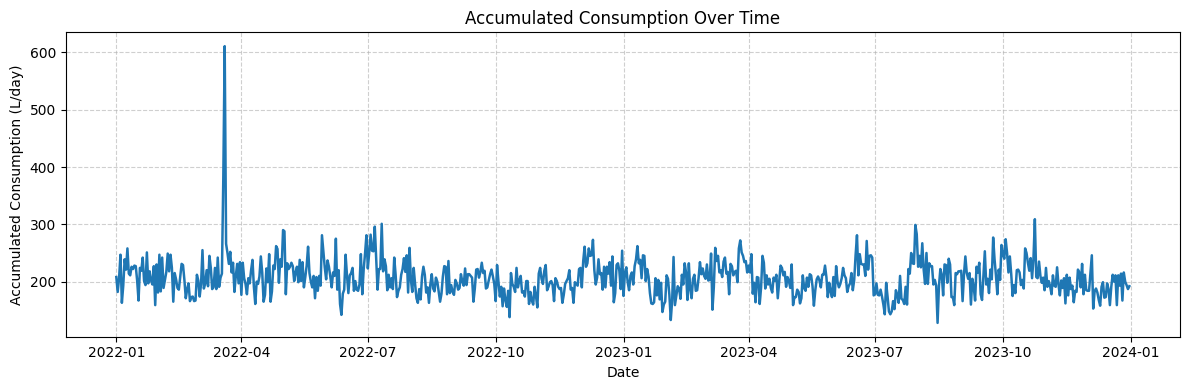

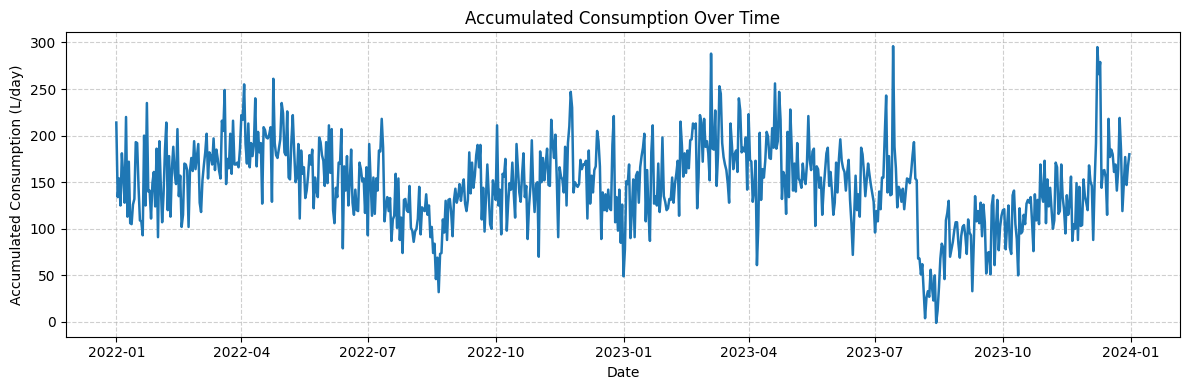

In [ ]:
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter for the two censal sections
ids_to_plot = ['0807302003_Hospitalet', '0822101006_Badalona']
df_subset = df[df['id'].isin(ids_to_plot)].sort_values(['id', 'Date'])

# Plot and save smooth lines for each
for _id in ids_to_plot:
    ts = df_subset[df_subset['id'] == _id]
    plt.figure(figsize=(12, 4))
    plt.plot(ts['Date'], ts['Accumulated consumption (L/day)'], linestyle='-', linewidth=1.8)
    plt.title(f"Accumulated Consumption Over Time")
    plt.xlabel("Date")
    plt.ylabel("Accumulated Consumption (L/day)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    plt.show()


In [ ]:
ts_hospitalet

,id,District,Date,Use,Number of meters,Accumulated consumption (L/day)
885002,0807302003_Hospitalet,2,2022-01-01,Domestic,15,208
885003,0807302003_Hospitalet,2,2022-01-02,Domestic,15,182
885004,0807302003_Hospitalet,2,2022-01-03,Domestic,15,206
885005,0807302003_Hospitalet,2,2022-01-04,Domestic,15,247
885006,0807302003_Hospitalet,2,2022-01-05,Domestic,15,163
...,...,...,...,...,...,...
885727,0807302003_Hospitalet,2,2023-12-27,Domestic,15,216
885728,0807302003_Hospitalet,2,2023-12-28,Domestic,15,200
885729,0807302003_Hospitalet,2,2023-12-29,Domestic,15,194
885730,0807302003_Hospitalet,2,2023-12-30,Domestic,15,187


In [ ]:
ts_badalona

,id,District,Date,Use,Number of meters,Accumulated consumption (L/day)
1033919,0822101006_Badalona,1,2022-01-01,Domestic,8,214
1033920,0822101006_Badalona,1,2022-01-02,Domestic,8,134
1033921,0822101006_Badalona,1,2022-01-03,Domestic,8,154
1033922,0822101006_Badalona,1,2022-01-04,Domestic,8,125
1033923,0822101006_Badalona,1,2022-01-05,Domestic,8,181
...,...,...,...,...,...,...
1034644,0822101006_Badalona,1,2023-12-27,Domestic,9,149
1034645,0822101006_Badalona,1,2023-12-28,Domestic,9,177
1034646,0822101006_Badalona,1,2023-12-29,Domestic,9,147
1034647,0822101006_Badalona,1,2023-12-30,Domestic,9,167


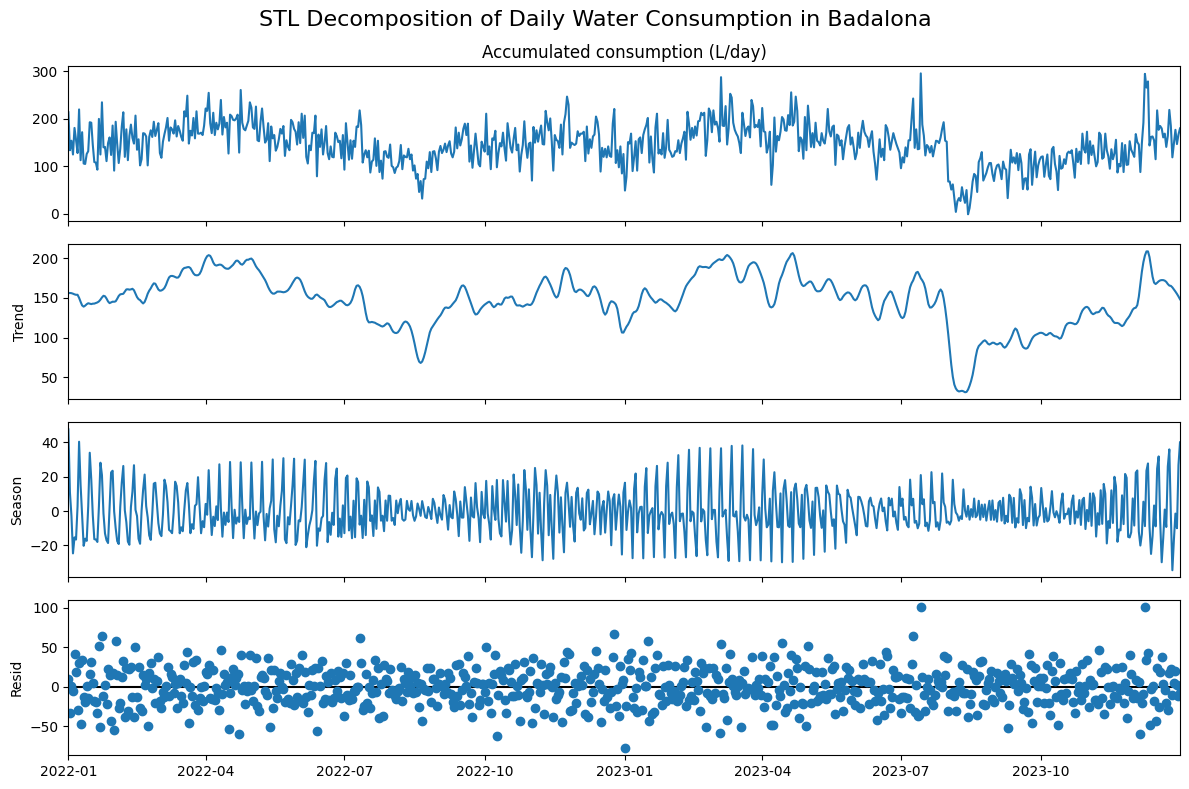

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Ensure 'Date' is datetime and set it as the index
ts_badalona['Date'] = pd.to_datetime(ts_badalona['Date'])
ts_badalona.set_index('Date', inplace=True)

# Resample to daily frequency if needed (and fill gaps if any)
ts_daily = ts_badalona['Accumulated consumption (L/day)'].resample('D').mean().interpolate()

# Perform STL decomposition
stl = STL(ts_daily, seasonal=13)  # seasonal=13 is common for weekly seasonality in daily data
result = stl.fit()

# Plot the decomposition
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle('STL Decomposition of Daily Water Consumption in Badalona', fontsize=16)
plt.tight_layout()
plt.show()


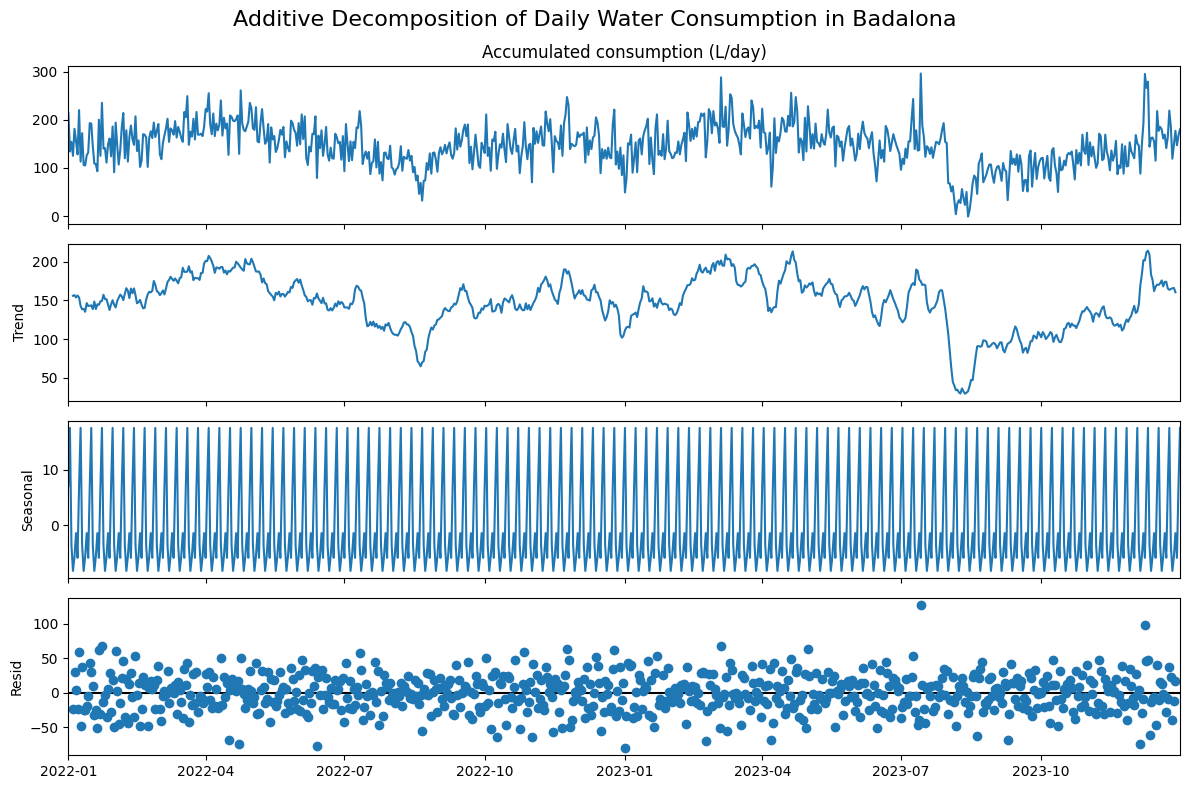

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_daily, model='additive', period=7)  # weekly seasonality
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Additive Decomposition of Daily Water Consumption in Badalona', fontsize=16)
plt.tight_layout()
plt.show()


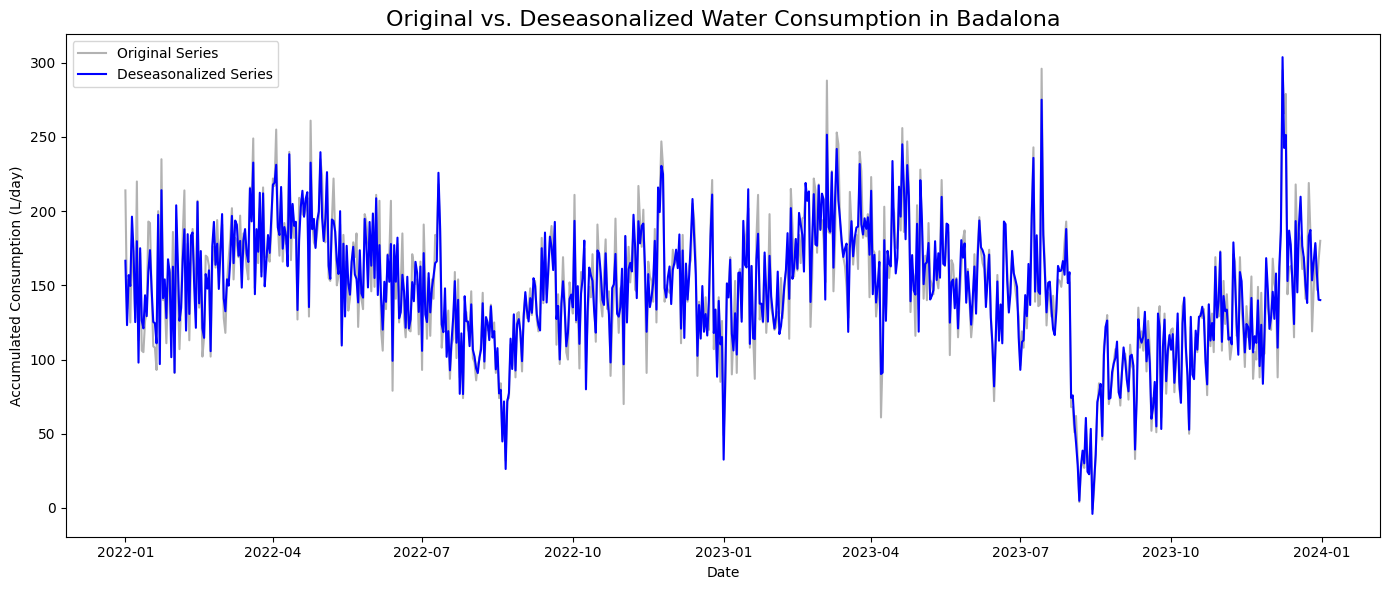

In [ ]:
# Resample to daily frequency and interpolate missing values
ts_daily = ts_badalona['Accumulated consumption (L/day)'].resample('D').mean().interpolate()

# Perform STL decomposition
stl = STL(ts_daily, seasonal=13)
result = stl.fit()

# Remove seasonality
deseasonalized = ts_daily - result.seasonal

# Plot both original and deseasonalized series
plt.figure(figsize=(14, 6))
plt.plot(ts_daily, label='Original Series', color='gray', alpha=0.6)
plt.plot(deseasonalized, label='Deseasonalized Series', color='blue')
plt.title('Original vs. Deseasonalized Water Consumption in Badalona', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Accumulated Consumption (L/day)')
plt.legend()
plt.tight_layout()
plt.show()


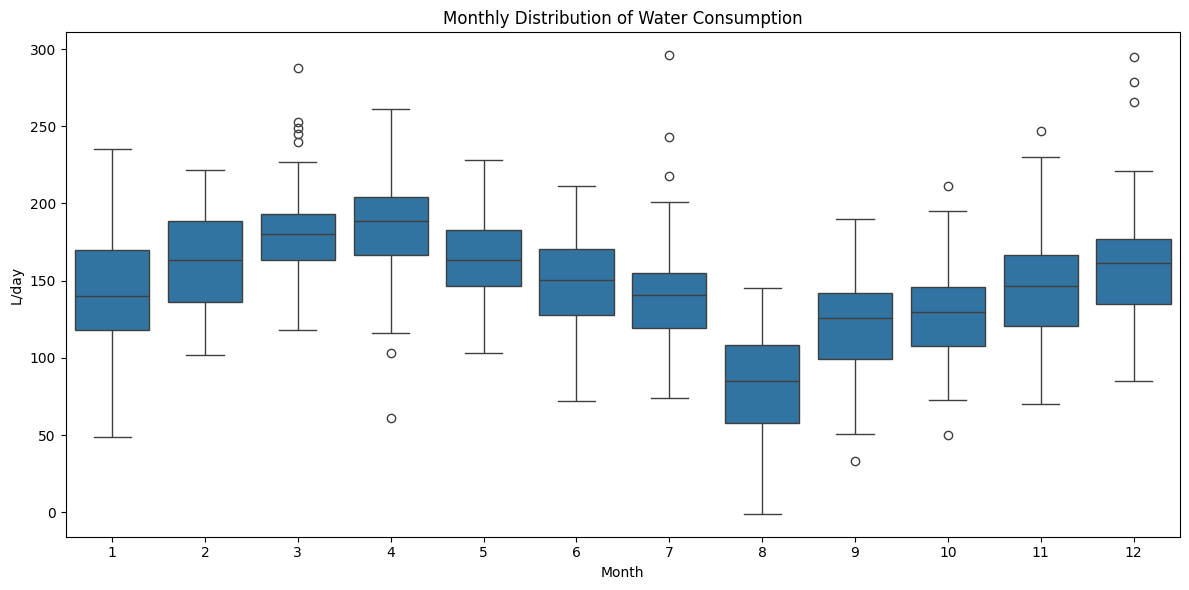

In [ ]:
# Monthly seasonality
import seaborn as sns

# Add a month column
ts_badalona['Month'] = ts_badalona.index.month

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Accumulated consumption (L/day)', data=ts_badalona)
plt.title('Monthly Distribution of Water Consumption')
plt.xlabel('Month')
plt.ylabel('L/day')
plt.tight_layout()
plt.show()


<ipython-input-14-a6b79821fd38>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = ts_badalona['Accumulated consumption (L/day)'].resample('M').mean()


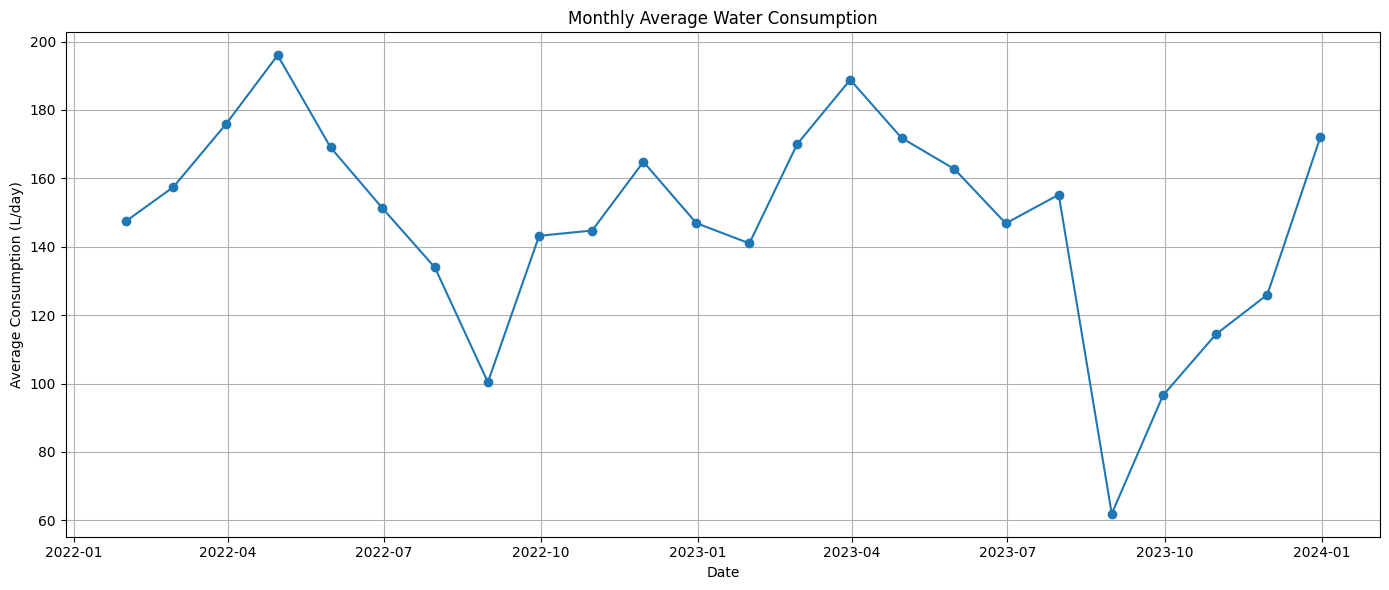

In [ ]:
monthly_avg = ts_badalona['Accumulated consumption (L/day)'].resample('M').mean()

plt.figure(figsize=(14, 6))
plt.plot(monthly_avg, marker='o')
plt.title('Monthly Average Water Consumption')
plt.xlabel('Date')
plt.ylabel('Average Consumption (L/day)')
plt.grid(True)
plt.tight_layout()
plt.show()


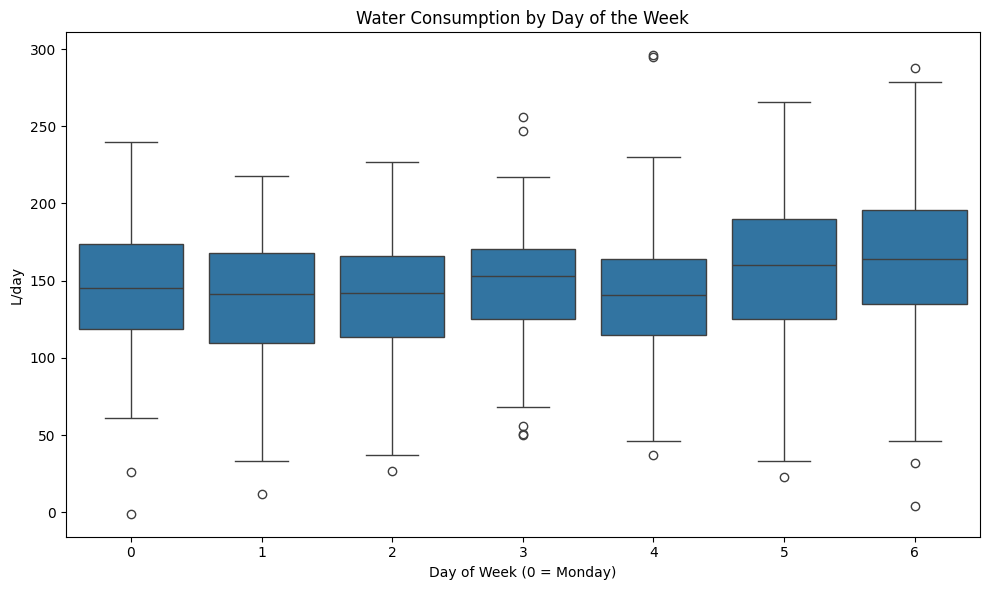

In [ ]:
import seaborn as sns

# Add weekday info (0 = Monday, 6 = Sunday)
ts_badalona['Weekday'] = ts_badalona.index.dayofweek

# Plot boxplot of consumption by weekday
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weekday', y='Accumulated consumption (L/day)', data=ts_badalona)
plt.title('Water Consumption by Day of the Week')
plt.xlabel('Day of Week (0 = Monday)')
plt.ylabel('L/day')
plt.tight_layout()
plt.show()


<Figure size 1000x400 with 0 Axes>

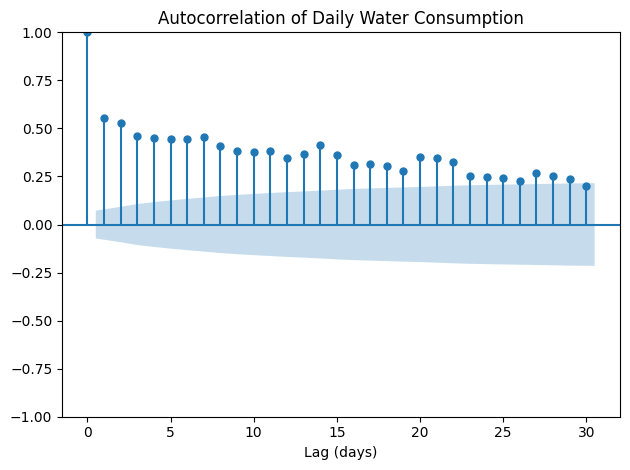

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 4))
plot_acf(ts_daily, lags=30)
plt.title('Autocorrelation of Daily Water Consumption')
plt.xlabel('Lag (days)')
plt.tight_layout()
plt.show()
